In [1]:
import tripyview.sub_notebookheader as nb_setup
# which_matplotlib = 'inline' (default), 
#                    'notebook'(jupyter notebook), 
#                    'widget'(jupyterlab)
nb_setup.init_notebook(which_matplotlib="inline")
# centralized autoimport of: 
# import os
# import warnings
# import time as clock
# import numpy as np
# import xarray as xr
# import shapefile as shp
# import tripyview as tpv
# client, use_existing_client = None, "tcp://0.0.0.0:0000"

/albedo/home/pscholz/tripyview/tripyview/sub_data.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw


/albedo/home/pscholz/tripyview


### INFO:
To compute especially on large unstructured grids #vertices>1M, you need to run this notebook in parallel (do_parallel=True) on several workers (parallel_nprc...is the number of dask worker that can be allocated, parallel_tmem...is the maximum available RAM that will be distributed between the dask workers). Therefor allocate a full !!! COMPUTE NODE !!! (admins might not be happy if you do this in parallel on a login node) of a HPC of your choice with as much memory (RAM) as you can get to run this notebook!

In [2]:
# parameters
#___Dask Client Parameters____________________________________________________________
do_papermill      = False
do_parallel       = True
# parallel_nprc     = 64   # number of total processes
# parallel_nthread  = 2    # number of threads per worker --> number worker = parallel_nprc/parallel_nthread
# parallel_tmem     = 256  # max. available RAM
parallel_nprc     = 48   # number of total processes
parallel_nthread  = 1    # number of threads per worker --> number worker = parallel_nprc/parallel_nthread
parallel_tmem     = 240  # max. available RAM


#___Mesh Path & Save Path_____________________________________________________________
# mesh_path ='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
mesh_path         = '/albedo/work/user/pscholz/mesh_fesom2.0/core2_srt_dep@node/'
# mesh_path         = '/work/ba1264/a270210/model/input/fesom2/dart/'

save_path         = None #'~/tripyview/Results/test_streaml/' #None
save_fname        = None # filename from papermill come in through save_fname
tripyrun_name     = None # papermill workflow name of notebook 
tripyrun_analysis = None # papermill diagnostic driver
tripyrun_spath_nb = None # papermill path to processed notebooks
tripyrun_spath_fig= None # papermill path to processed figures

#___Data Path & Input Names___________________________________________________________
input_paths   = list()
# input_paths.append('/albedo/work/projects/p_fesom/pscholz/project_TRR181/trr181_tke+idemix_jayne_bin_ck0.1/5/')
# input_paths.append('/albedo/work/projects/p_fesom/pscholz/project_TRR181/trr181_tke+idemix_nycander_bin_ck0.1/5/')
# input_paths.append('/albedo/work/projects/p_fesom/pscholz/project_TRR181/trr181_tke+idemix_stormtide_bin_ck0.1/5/')
input_paths.append('/albedo/work/projects/p_fesom/pscholz/project_TRR181/trr181_tke_ctrl_ck0.1/5/')
# input_paths.append('/work/ab0995/a270210/runtime/awicm3-v3.1_refactoring/TCO319L137-DART/hist1950d/outdata/fesom/')

input_names   = list()
# input_names.append('TKE+IDEMIX, jayne')
# input_names.append('TKE+IDEMIX, nycander')
# input_names.append('TKE+IDEMIX, stormtide')
input_names.append('TKE')
# input_names.append('Tido Test')

# n_cycl: which spinupcycle should be plottet if do_allcycl all spinupcycles from [1...n_cycle] are plottet, if None path is directly used
n_cycl         = None
do_allcycl     = False
vname          = 'temp'
vname_vec      = 'vec+u+v'
do_cgrain      = True # do coarse graining (True) or linear interpolation (False) of u,v data to regular grid
year           = [1979, 2014]
mon            = None
day            = None
record         = None 
box            = None
depth          = 250
do_datavec_r2g = False  # set to False if u,v data are already in geo-coordinates
do_bolus       = False  # add bolus velocity to vec+u+v
dlon, dlat     = 1.0, 1.0

#___Define Reference Data, Year, Mon ...______________________________________________
# do anomaly plots in case ref_path is not None
ref_path  = None # '/albedo/work/projects/p_fesom/pscholz/project_TRR181/trr181_tke_ctrl_ck0.1/5/'
ref_name  = None # 'TKE'
ref_year  = None #[1979, 2019]
ref_mon   = None
ref_day   = None
ref_record= None

#___Define Climatology________________________________________________________________
which_clim= 'phc3'
clim_path = '/albedo/work/projects/p_fesom/FROM-OLLIE/FESOM2/hydrography/phc3.0/phc3.0_annual.nc'
# clim_path = '/pool/data/AWICM/FESOM2/INITIAL/phc3.0/phc3.0_annual.nc'

#___Define Colormap Parameters________________________________________________________
# papermill doesnt like multi variable alignment in a single line
cstr      = 'blue2red'
cnum      = 15
cref      = None
crange    = None
cmin      = None
cmax      = None
cfac      = None
climit    = None
chist     = True
ctresh    = 0.995

ref_cstr  = 'wbgyr'
ref_cnum  = 15
ref_cref  = None
ref_crange= None
ref_cmin  = None
ref_cmax  = None
ref_cfac  = None
ref_climit= None
ref_chist = True
ref_ctresh= 0.995

#___Define Plot Parameters____________________________________________________________
ncol              = 2      # number of pannel columns in figure
nrow              = None
proj              = 'rob' 
box               = [-180, 180, -90, 90]
do_plt            = 'tpc'  # plot pcolor (tpc) or contourf (tcf)
plt_contb         = True   # background contour line (thin)
plt_contf         = False  # contour line of main colorbar steps 
plt_contr         = False  # contour line of reference value 
plt_contl         = False  # label contourline of main colorbar steps 
do_rescale        = None   # rescale data: None, 'log10', 'slog10', np.array(...)
do_lsm            ='fesom' # 'fesom', 'bluemarble', 'etopo', 'stock'
do_mesh           = False, 
mesh_opt          = dict({'color':'k', 'linewidth':0.10})
do_enum           = False  # do enumeration of panels
do_reffig         = True   # plot reference fig when doing anomalies 
do_clim           = False   # plot climatolgy values when doing absoluts
ax_title          = None
cb_label          = None
save_dpi          = 150 #300
save_fmt          = ['png']

In [3]:
# client.shutdown()

In [4]:
# start parallel dask client if do_parallel=True
client = tpv.shortcut_setup_daskclient(client, 
                                       use_existing_client, 
                                       do_parallel, 
                                       parallel_nprc, 
                                       parallel_tmem,
                                       threads_per_worker=parallel_nthread)

No existing Dask cluster found at: tcp://0.0.0.0:0000


2025-04-23 15:02:39,345 - distributed.scheduler - WARNING - Failed to format dashboard link, unknown value: 'JUPYTERHUB_SERVICE_PREFIX'


Started a new Dask client: <Client: 'tcp://127.0.0.1:33943' processes=48 threads=48, memory=201.17 GiB>


KeyError: 'JUPYTERHUB_SERVICE_PREFIX'

<Client: 'tcp://127.0.0.1:33943' processes=48 threads=48, memory=201.17 GiB>

In [5]:
#___LOAD FESOM2 MESH___________________________________________________________________________________
mesh=tpv.load_mesh_fesom2(mesh_path, do_rot='None', focus=0, do_info=True, do_pickle=True)

#______________________________________________________________________________________________________
# create input_path spinupcycle structure
input_paths, input_names, ref_path, ref_name = tpv.shortcut_setup_pathwithspinupcycles(input_paths, input_names, ref_path, ref_name, n_cycl, do_allcycl)  

#______________________________________________________________________________________________________
cinfo=tpv.set_cinfo(cstr, cnum, crange, cmin, cmax, cref, cfac, climit, chist, ctresh)
ref_cinfo=None
if (ref_path != None): 
    if ref_year   is None: ref_year   = year
    if ref_mon    is None: ref_mon    = mon
    if ref_record is None: ref_record = record
    cinfo['cref']=0.0 
    ref_cinfo=tpv.set_cinfo(ref_cstr, ref_cnum, ref_crange, ref_cmin, ref_cmax, ref_cref, ref_cfac, ref_climit, ref_chist, ref_ctresh)
    
#______________________________________________________________________________________________________    
# concatenate ref_path and input_path together if is not None,  concatenate list = list1+list2
input_paths, input_names = tpv.shortcut_setup_concatinputrefpath(input_paths, input_names, ref_path, ref_name)

# #______________________________________________________________________________________________________
# # define index regions --> reading shape files
# box = tpv.shortcut_setup_boxregion(box_region)

#______________________________________________________________________________________________________
# use number of worker dependent chunk size for nodes and elements
chunks = dict({'time' : 'auto'     , 
               'elem' : mesh.n2de  , #'auto', 
               'nod2' : mesh.n2dn  , #'auto', 
               'nz1'  : mesh.nlev-1, # 1 
               'nz'   : mesh.nlev  , # 1
               'edg_n': 'auto'}) 

if client is not None:
    # set size limit of time chunks so that size of the total chunks covers 10% of worker memory
    mem_thresh     = 0.08
    worker_info    = client.run_on_scheduler(lambda dask_scheduler: {worker: ws.memory_limit for worker, ws in dask_scheduler.workers.items()})
    mem_limit_byte = next(iter(worker_info.items()))[1]
    print(' --> worker memory      : {:04.2f}Mb'.format(mem_limit_byte/1024**2))
    print(' --> limit chunksize to : {:04.2f}Mb'.format(mem_limit_byte/1024**2*mem_thresh))
    chunk_size = mem_limit_byte * mem_thresh/4 # dive by 4 because we use 4byte single precision
    if   chunks['time'] == -1    : chunk_size = chunk_size/12    
    elif chunks['time'] != 'auto': chunk_size = chunk_size/chunks['time']    
    if   chunks['nod2'] == -1    : chunk_size = chunk_size/mesh.n2dn
    elif chunks['elem'] == -1    : chunk_size = chunk_size/mesh.n2de
    elif chunks['nod2'] != 'auto': chunk_size = chunk_size/chunks['nod2']    
    elif chunks['elem'] != 'auto': chunk_size = chunk_size/chunks['elem']
    if   chunks['nz']   == -1    : chunk_size = chunk_size/mesh.nlev
    elif chunks['nz1']  == -1    : chunk_size = chunk_size/mesh.nlev
    elif chunks['nz']   != 'auto': chunk_size = chunk_size/chunks['nz']
    elif chunks['nz1']  != 'auto': chunk_size = chunk_size/chunks['nz1']
    chunks['time'] = np.min([np.int32(np.ceil(chunk_size)), 12])
    print(' --> set time chunk size to {:2.2f}% of worker mem.: {:d}'.format(100*mem_thresh, chunks['time']))
print(chunks)    

 > warning: pickle5 module could not be found, no do_pickle 
 is possible! Therefor switch to joblib saving/loading
 > found *.jlib file: /albedo/work/user/pscholz/mesh_fesom2.0/core2_srt_dep@node
 > load  *.jlib file: tripyview_fesom2_core2_srt_dep@node_focus0.jlib
___FESOM2 MESH INFO________________________
 > path            = /albedo/work/user/pscholz/mesh_fesom2.0/core2_srt_dep@node
 > id              = core2_srt_dep@node
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = True
 > do earea,eresol = True, False
 > do narea,nresol = True, False
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 48
___________________________________________
 --> worker memory      : 4291.53Mb
 --> limit chunksize to : 343.32Mb
 --> set time chunk size to 8.00% of worker mem.: 12
{'time': np.int64(12), 'elem': 244659, 'nod2': 126858, 'nz1': 47, 'nz': 4

In [6]:
#______________________________________________________________________________________________________________
# do regular binning of diapycnal velocities
Rearth     = 6371e3
if proj in ['ortho', 'nears']: 
    lon_reg    = np.arange(-180, 180+dlon, dlon)
    lat_reg    = np.arange(-90, 90+dlat, dlat)
else:    
    lon_reg    = np.arange(box[0], box[1]+dlon, dlon)
    lat_reg    = np.arange(box[2], box[3]+dlat, dlat)

#______________________________________________________________________________________________________________
# define function for longitudinal binning --> should be possible to parallelize
# this loop since each lon bin is independent
def coarsegrain_over_lon_lat(lon_i_ip1, lat_reg, dlon, dlat, data):
    
    # select all elements that are within longitudinal bin 
    if   'nod2' in list(data.dims): dim_h = 'nod2'
    elif 'elem' in list(data.dims): dim_h = 'elem'
    lonbin = data.isel({dim_h:np.where(((data.lon-lon_i_ip1[0])*(data.lon-lon_i_ip1[1]) <= 0.))[0]}).copy()
    
    # do latitudinal binning within the selected longitudinal bin
    latbin = lonbin.groupby_bins('lat',lat_reg)
    del(lonbin)
    
    # iterate through each bin in latbin and collect the data and compute area sum weighted u,v values 
    # within each lat bin 
    latbin_list = []
    dy, rad     = np.pi*Rearth*dlat/180, np.pi/180
    for bin_ii, latbin_ii in latbin:
        dx        = np.pi*Rearth*dlon/180*np.cos((bin_ii.left+bin_ii.right)/2.0*rad)
        latbin_ii = latbin_ii*latbin_ii['w_A']
        latbin_ii = latbin_ii.sum(dim=dim_h, skipna=True)/dx/dy  
         
        # if u and v are zero set to nan is most likely lsmask
        vnm = list(latbin_ii.data_vars)
        if latbin_ii[vnm[0]].data == 0.0 and latbin_ii[vnm[1]].data == 0.0:
            latbin_ii[vnm[0]].data, latbin_ii[vnm[1]].data = np.nan, np.nan   
        del(vnm)
         
        # give each bin a lat, lon dimension on value --> need for concat along dimension
        latbin_ii = latbin_ii.expand_dims({'lat': np.float32( [(bin_ii.left +bin_ii.right)/2.0] ), 
                                           'lon': np.float32( [(lon_i_ip1[0]+lon_i_ip1[1])/2.0] )
                                          })   
        # add additional dataset coords, binning boundaries and area of lon,lat bin
        latbin_ii = latbin_ii.assign_coords({'lat_bnd':(('lat', 'n2' ), np.float32( [[bin_ii.left , bin_ii.right]] ) ),
                                             'lon_bnd':(('lon', 'n2' ), np.float32( [[lon_i_ip1[0], lon_i_ip1[1]]] ) ), 
                                             'w_A'    :(('lat', 'lon'), np.float32( [[dx*dy                     ]] ) )
                                            })
        
        # make velocity data float32
        latbin_ii = latbin_ii.astype('float32')
        
        # collect each separate lat bin in a list   
        latbin_list.append(latbin_ii) 
            
    del(latbin, latbin_ii) 
    # conncat single latitudinal binning list along lat dimension into combined dataset
    latbin = xr.concat(latbin_list, dim="lat")
    return(latbin)    


#______________________________________________________________________________________________________________
# define function for linear interpolation of velocity data
def interpolate_over_lon_lat(mesh, data_v, lon_reg, lat_reg):
    import matplotlib.tri as mtri
    import matplotlib.pyplot as plt
    
    # create matplotlib triangulation with clean augmented periodic boundaries
    tri   = mtri.Triangulation(np.hstack((mesh.n_x                 , mesh.n_xa)), 
                               np.hstack((mesh.n_y                 , mesh.n_ya)), 
                               np.vstack((mesh.e_i[mesh.e_pbnd_0,:], mesh.e_ia)))
    
    # Creat triangular linear interpolator 
    vnm   = list(data_v.data_vars)
    aux_u = np.hstack(( data_v[vnm[0]].data, data_v[vnm[0]].data[mesh.n_pbnd_a] ))
    aux_v = np.hstack(( data_v[vnm[1]].data, data_v[vnm[1]].data[mesh.n_pbnd_a] ))
    interp_u, interp_v = mtri.LinearTriInterpolator(tri, aux_u ), mtri.LinearTriInterpolator(tri, aux_v )
    del(aux_u, aux_v)

    # Create a regular grid to interpolate onto
    xi, yi       = np.meshgrid(lon_reg, lat_reg)
    
    # Create regular grid u,v xarray dataset
    dict_dat, dict_coord = dict(), dict()
    dict_coord['lon'] = (['lon' ], lon_reg.astype('float32'), dict({'short_name':'Longitude', 'unit':'degree'})) 
    dict_coord['lat'] = (['lat' ], lat_reg.astype('float32'), dict({'short_name':'Latitude' , 'unit':'degree'}))
    dict_dat[vnm[0]]  = (['lat','lon'], interp_u(xi, yi).astype('float32'), data_v[vnm[0]].attrs)
    dict_dat[vnm[1]]  = (['lat','lon'], interp_v(xi, yi).astype('float32'), data_v[vnm[1]].attrs)
    data_v = xr.Dataset(data_vars=dict_dat, coords=dict_coord, attrs=data_v.attrs)
    del(xi, yi, interp_u, interp_v, dict_dat, dict_coord, tri )
    return(data_v)

In [7]:
t0 = clock.time()
# clean up garabage on workers before the party starts!
if client is not None: client.run(gc.collect)
    
#______________________________________________________________________________________________________________
data_list, data_v_list = list(), list()
for ii, (datapath, descript) in enumerate(zip(input_paths, input_names)):
    print(ii, datapath, descript)
    #__________________________________________________________________________________________________________
    yeari, moni, dayi, recordi = year, mon, day, record
    if (ii==0) and (ref_path != None): yeari, moni, dayi, recordi = ref_year, ref_mon, ref_day, ref_record

    #__________________________________________________________________________
    input_dict = dict({'year':yeari, 'mon':moni, 'day':dayi, 'record':recordi, 'depth':depth, 
                       'descript':descript, 'do_info':False, 'do_rot':do_datavec_r2g, 'do_ie2n':False, 
                       'do_load':False, 'do_persist':False, 'chunks':chunks, 'do_parallel':do_parallel, 'client':client})
    
    #__________________________________________________________________________________________________________
    # load scalar data
    ts = clock.time()
    data = tpv.load_data_fesom2(mesh, datapath, vname=vname, **{**input_dict,'do_load':True})
    if data is None: raise ValueError(f'data == None, data could not be readed, your path:{datapath} might be wrong!!!')
    print(' --> elasped time to load {:s} data: {:3.2f} min.'.format(vname, (clock.time()-ts)/60  ))        
    print(' --> data uses {:3.2f} Gb:'.format(data.nbytes/(1024**3)))
    print('')
    
    #__________________________________________________________________________________________________________
    # load vector data e.g. velocity
    ts = clock.time()
    data_v = tpv.load_data_fesom2(mesh, datapath, vname=vname_vec, **input_dict)
    if data_v is None: raise ValueError(f'data_vec == None, data could not be readed, your path:{datapath} might be wrong!!!')
    
    # add bolus velocity
    if do_bolus and vname == 'vec+u+v':
        data_v['u'].data = data_v['u'].data + tpv.load_data_fesom2(mesh, datapath, vname='bolus_u', **input_dict)['bolus_u'].data
        data_v['v'].data = data_v['v'].data + tpv.load_data_fesom2(mesh, datapath, vname='bolus_v', **input_dict)['bolus_v'].data
    
    print(' --> elasped time to load {:s} data: {:3.2f} min.'.format(vname_vec, (clock.time()-ts)/60  ))        
    print(' --> data uses {:3.2f} Gb:'.format(data_v.nbytes/(1024**3)))
    print('')

    #___________________________________________________________________________________________________________
    # coarse grain vector data via binning over longitude and latitude
    # do it serial
    if do_cgrain:
        ts = clock.time()
        if not do_parallel:
            lonlatbin = [None]*mlon_reg.size
            for xi in range(0, mlon_reg.size):
                lonlatbin[xi] = coarsegrain_over_lon_lat([lon_reg[xi], lon_reg[xi+1]], lat_reg, dlon, dlat, data_v)
            data_vreg = xr.concat(lonlatbin, dim="lon", coords="minimal", compat='override')
            del(lonlatbin)    
        # do it parallel
        else:
            # from joblib import Parallel, delayed
            # lonlatbin = Parallel(n_jobs=parallel_nprc_bin)(delayed(coarsegrain_over_lon_lat)([lon_reg[xi], lon_reg[xi+1]], lat_reg, dlon, dlat, data) for xi in range(0,mlon_reg.size))
            # data_vreg = xr.concat(lonlatbin, dim="lon", coords="minimal", compat='override')
            # del(lonlatbin)

            # dask solution! already paralelized on chunks
            # data_vreg = coarsegrain_uv_over_lon_lat_dask(data_v, do_parallel, parallel_nprc, dlon=dlon, dlat=dlat, )
            data_vreg = tpv.coarsegrain_h_dask(data_v, do_parallel, parallel_nprc, dlon=dlon, dlat=dlat, client=client)
        del(data_v)
        print(' --> elasped time to coarse data: {:3.2f} min.'.format( (clock.time()-ts)/60  ))        
        
    # Linear interpolate u,v data to regular grid
    else:
        ts = clock.time()
        data_vreg = interpolate_over_lon_lat(mesh, data_v, lon_reg, lat_reg)
        print(' --> elasped time to interpolate data: {:3.2f} min.'.format( (clock.time()-ts)/60  ))        
    
    #__________________________________________________________________________________________________    
    # create reference data if given 
    if (ii==0) and (ref_path != None):
        data_ref, data_vreg_ref = data, data_vreg
        if do_reffig: 
            data_list.append(data_ref) 
            data_v_list.append(data_vreg_ref) 
        continue
        
    #__________________________________________________________________________________________________    
    # compute anomaly 
    if (ref_path != None):
        data_list.append(  tpv.do_anomaly(data     , data_ref     ))  
        data_v_list.append(tpv.do_anomaly(data_vreg, data_vreg_ref))  
    # compute absolute    
    else:
        data_list.append(data)
        data_v_list.append(data_vreg)
    del(data, data_vreg)
    if client is not None: client.run(gc.collect)
        
if (ref_path != None): del(data_ref, data_vreg_ref)
print(' --> total elasped time to process data: {:3.2f} min.'.format( (clock.time()-t0)/60  ))       

0 /albedo/work/projects/p_fesom/pscholz/project_TRR181/trr181_tke_ctrl_ck0.1/5/ TKE


/albedo/home/pscholz/.conda/envs/py39_new/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 25.42 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


 --> elasped time to load temp data: 0.08 min.
 --> data uses 0.00 Gb:

 --> elasped time to load vec+u+v data: 0.04 min.
 --> data uses 0.01 Gb:

 --> nchunk= 1
 --> rechunk array size --> nchunk_new= 48


/albedo/home/pscholz/tripyview/tripyview/sub_data.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw
/albedo/home/pscholz/tripyview/tripyview/sub_data.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw
/albedo/home/pscholz/tripyview/tripyview/sub_data.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw
/albedo/home/pscholz/tripyview/tripyview/sub_data.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw
/albedo/home/pscholz/tripyview/tripyview/sub_data.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw
/albedo/home/pscholz/tripyview/tripyview/sub_data.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw
/albedo/home/pscholz/tripyview/tripyview/sub_data.py:8: UserWarning: The seawater 

 --> elasped time to coarse data: 0.10 min.
 --> total elasped time to process data: 0.22 min.


--> cmin/cmax: norm: -1.849490/20.990886, hist: -0.810253/19.814607, fin: -0.810253/19.814607
{'cstr': 'blue2red', 'cnum': 15, 'chist': True, 'ctresh': 0.995, 'cnlab': 8, 'cmin': np.float64(-0.81), 'cmax': np.float64(19.81), 'cref': np.float64(10.0), 'cmap': <matplotlib.colors.ListedColormap object at 0x154e25feb130>, 'clevel': array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12., 13., 14., 15., 16., 17., 18., 19., 20.]), 'clab': array([ 1.,  4.,  7., 10., 13., 16., 19.])}
 --> plot bot    chunk:0|
 --> plot data   chunk:0|


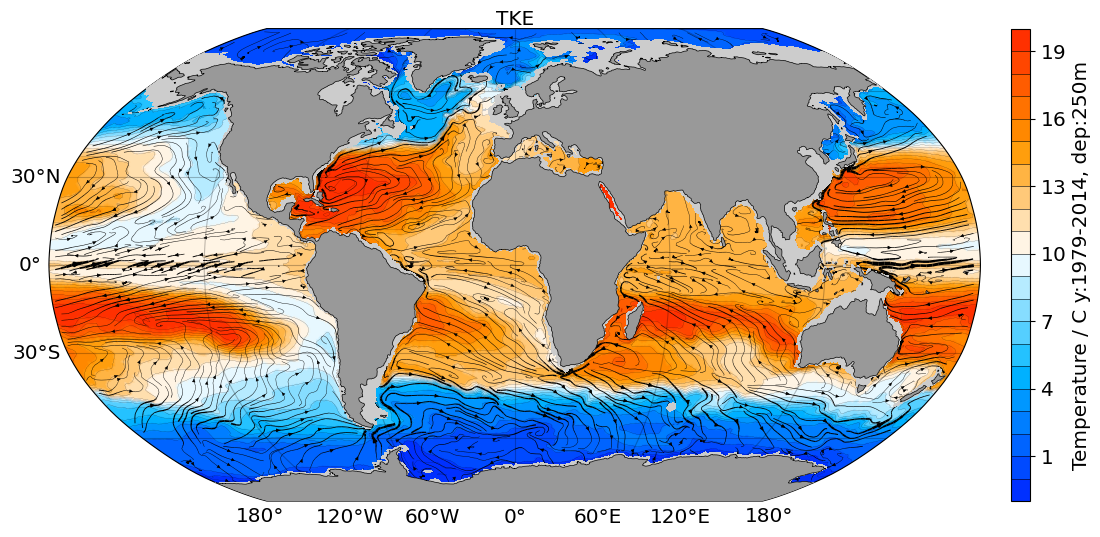

 --> elasped time to plot data: 0.39 min.


In [8]:
#___PLOT FESOM2 DATA___________________________________________________________________________________
ts = clock.time()
ndat   = len(data_list)
if   ncol != None: 
    ncol0  = np.min([ncol,ndat])    
    nrow0  = np.ceil(ndat/ncol0).astype('int')
elif nrow != None: 
    nrow0  = np.min([nrow,ndat])    
    ncol0  = np.ceil(ndat/nrow0).astype('int')
    
idx=1 if do_clim else 0       
svname = list(data_list[idx].data_vars)[0]
slabel = data_list[idx][svname].attrs['str_lsave']

#______________________________________________________________________________________________________
# do save filename path
spath  = save_path
sfpath = None
if spath!=None: 
    sfpath=list()
    for sfmt in save_fmt: sfpath.append( os.path.join(spath,'{:s}_{:s}_{:s}.{:s}'.format(svname, proj, slabel, sfmt)) )
if save_fname!=None: sfpath = [save_fname] # --> needed for diagrun papermille functionality

#______________________________________________________________________________________________________
# do colorbar either single cbar or ref_cbar + anom_cbar
if (ref_path != None) and do_reffig: cb_plt, cb_plt_single, cinfo0 = [1]+[2]*(nrow0*ncol0-1), False, [ref_cinfo.copy(), cinfo.copy()]
else: cb_plt, cb_plt_single, cinfo0 = True, True, cinfo.copy() 

#__________________________________________________________________________________________________
hfig, hax, hcb = tpv.plot_hslice(mesh, data_list, cinfo=cinfo0, box=box, nrow=nrow0, ncol=ncol0, proj=proj, do_rescale=do_rescale,  
                                do_streaml=True, streaml_dat=data_v_list, streaml_opt=dict({'density':5.0, 'arrowsize':0.5, 'arrowstyle':'-|>', 'lw_min':0.25, 'lw_max':5.0}), 
                                do_streaml_leg=False,  #streaml_leg_opt=dict({'x':75, 'y':60, 'dy':5, 'dw':10}), 
                                do_plt=do_plt, plt_contb=plt_contb, plt_contf=plt_contf, plt_contr=plt_contr, plt_contl=plt_contl, do_enum=do_enum, 
                                ax_opt=dict({'fig_sizefac':3.0, 'cb_plt':cb_plt, 'cb_plt_single':cb_plt_single, 'cb_pos':'vertical', 'cb_h':'auto',}), # 'fs_label':14, 'fs_ticks':14, 'ax_dt':1.0}),
                                cbl_opt=dict(), cb_label=cb_label, cbtl_opt=dict(),
                                do_save=sfpath, save_dpi=save_dpi)  

print(' --> elasped time to plot data: {:3.2f} min.'.format( (clock.time()-ts)/60  ))       

In [9]:
if do_papermill and do_parallel and client is not None: client.shutdown()